# **Exercise 3 (Percolation)**

## Question 4.1 (Percolation)

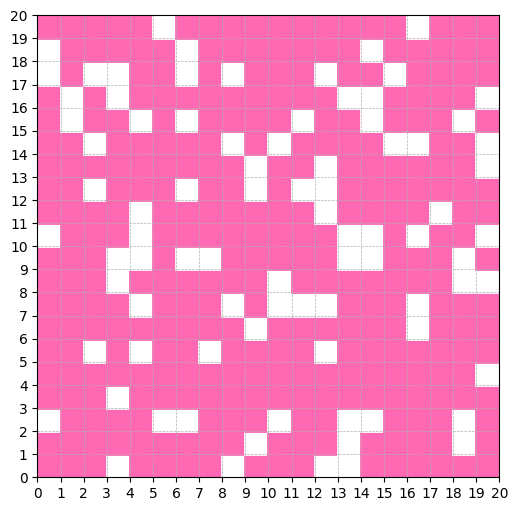

1


In [ ]:
#this problem is kind of like making a maze (Percolation) and solving it (Percolation determination)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# making the grid
L = 20  #length of the squares
ax.set_xticks(np.arange(0, L+1, 1))
ax.set_yticks(np.arange(0, L+1, 1))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

#drawing the squares
p=0.3
goodsquares=[]
for i in range (0,L,1): 
    for j in range (0,L,1): 
        gridnumber=np.random.rand()
        if gridnumber >= p : # pink = on
            square= plt.Rectangle((i, j), 1, 1, fill=True, facecolor='hotpink', edgecolor='hotpink', linewidth=2)
            ax.add_patch(square) 
            goodsquares.append([i,j]) #we need all the squares that are filled(on) in a list for finding a way from left to right later
            goodsquares.sort()
        else:  #white= off
            square= plt.Rectangle((i, j), 1, 1, fill=True, facecolor='white', edgecolor='white', linewidth=2)
            ax.add_patch(square)
plt.show()

#finding a way from left to right

#filling an empty list with the starting point(those that their x is 0)
meow=[]
for z in goodsquares:
    if z[0]==0:
        meow.append(z)

#now for every coordinates in meow check their neighbors(up/right)
for k in meow:
    x=k[0]+1
    y=k[1]+1
    if ([x,k[1]] in goodsquares) and ([x,k[1]] not in meow):
        meow.append([x,k[1]])
    if ([k[0],y] in goodsquares) and ([k[0],y] not in meow):
        meow.append([k[0],y])
    if ([k[0],y-2] in goodsquares) and ([k[0],y-2] not in meow):
        meow.append([k[0],y-2])

#putting all the x in an empty list
jojo=[]
for k in meow:
    jojo.append(k[0]) 
jojo.sort()

#cheking if that list of Xs contains all the x axis because if it doesn't then there's no way ofcourse:)
s=False
for i in range(len(jojo)-1):
    if abs(jojo[i]-jojo[i+1]) == 0 or abs(jojo[i]-jojo[i+1]) ==1:
        s=True
    else:
        s=False
        break
if s==True and max(jojo)==(L-1):
    print("1") #1= there's a way
else:
    print("0") #0= there's no way

## Question 4.2 (Coloring Algorithm)

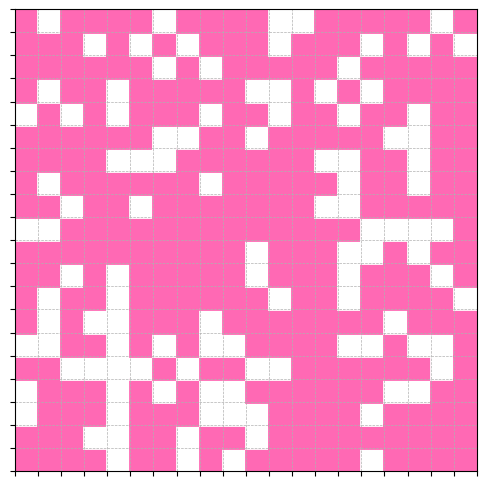

1


In [ ]:
#this code is kind of like making a maze (Percolation) and solving it (Percolation determination)


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# making the grid
L = 20  #length of the squares
ax.set_xticks(np.arange(0, L+1, 1))
ax.set_yticks(np.arange(0, L+1, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

#drawing the squares

goodsquares=[]
intmax=20000
p=0.3
colorstate={}
a=0
for x in range (0,L,1): 
    for y in range (0,L,1): 
        if x==0:
            number = 1
            colorstate[(0,y)]=number
        if x==L-1:
            number = intmax
            colorstate[(x,y)]=number 
            
for x in range (0,L,1): 
    for y in range (0,L,1): 
        gridnumber=np.random.rand()
        if gridnumber >= p : # pink = on
            square= plt.Rectangle((x, y), 1, 1, fill=True, facecolor='hotpink', edgecolor='hotpink', linewidth=2)
            ax.add_patch(square) 
            colorstate[(x,y)]= np.random.randint(1,intmax,1)
            a=0
            list=[]
            if (x+1,y)  in colorstate:
                a+=1
                list.append(colorstate[(x+1,y)])
            if (x-1,y)  in colorstate:
                a+=1
                list.append(colorstate[(x-1,y)])
            if (x,y+1)  in colorstate:
                a+=1
                list.append(colorstate[(x,y+1)])
            if (x,y-1)  in colorstate:
                a+=1
                list.append(colorstate[(x,y-1)])                            
            if a==0:
                True
            if a==1:
                colorstate[(x,y)]=list[0]
            if a>1:
                colorstate[(x,y)]=min(list)
                for i in colorstate:
                    if colorstate[i] in list:
                        colorstate[i]=min(list)
        else:  #white= off
            square= plt.Rectangle((x, y), 1, 1, fill=True, facecolor='white', edgecolor='white', linewidth=2)
            ax.add_patch(square)
plt.show()
b=0
for y in range (0,L,1): 
        if colorstate[(L-1,y)]== 1:
            print('1')
            b=1
            break
if b==0:
    print('0')

## Question 4.3 (Hoshen Kopelman)

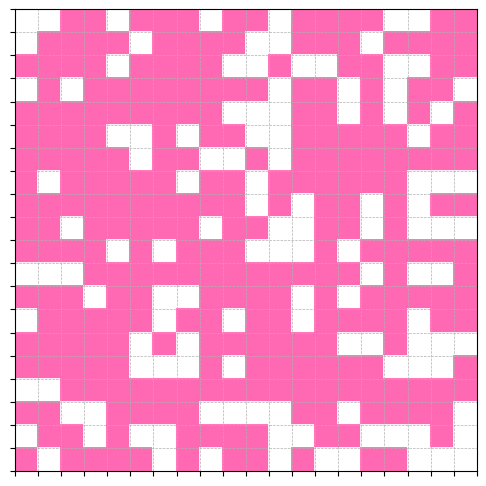

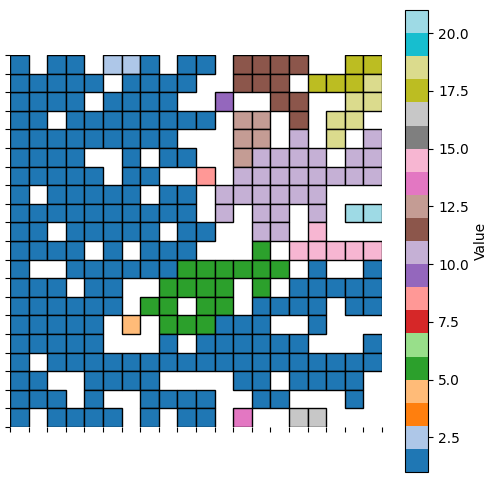

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# making the grid
L=20 #length of the squares
ax.set_xticks(np.arange(0, L+1, 1))
ax.set_yticks(np.arange(0, L+1, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

p=0.3
colorstate={}
for x in range (0,L,1): 
    for y in range (0,L,1): 
        if x==0:
            number = 1
            colorstate[(0,y)]=number
k=1
clustermagnitude=0
for x in range (0,L,1): 
    for y in range (L-1,-1,-1): 
        gridnumber=np.random.rand()
        if gridnumber >= p : # on
            square= plt.Rectangle((x, y), 1, 1, fill=True, facecolor='hotpink', edgecolor='hotpink', linewidth=2)
            ax.add_patch(square) 
            a=0
            list=[]
            if (x-1,y)  in colorstate:
                a+=1
                list.append(colorstate[(x-1,y)])
            if (x,y+1)  in colorstate:
                a+=1
                list.append(colorstate[(x,y+1)])                            
            if a==0:
                colorstate[(x,y)]=k
                k+=1 #every time if we got no neighbors we should add 1 to the colorstate
            if a==1:
                colorstate[(x,y)]=list[0]
            if a>1:
                colorstate[(x,y)]=colorstate[(x-1,y)]
                colorstate[(x,y+1)]=colorstate[(x-1,y)]

        else:  #white= off
            square= plt.Rectangle((x, y), 1, 1, fill=True, facecolor='white', edgecolor='white', linewidth=2)
            ax.add_patch(square)
plt.show()



fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
cmap = plt.cm.tab20
norm = plt.Normalize(min(colorstate.values()), max(colorstate.values()))
for (x, y), value in colorstate.items():
    color = cmap(norm(value))  
    rect = patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor='black')
    ax.add_patch(rect)

ax.set_xticks(np.arange(0, L+1, 1))
ax.set_yticks(np.arange(0, L+1, 1))
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.set_aspect('equal')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Value")
plt.show()




## Question 4.4 (The Probabilty of having an infinite cluster(Q))

### L=10

L: 10
p: 1    | success: 100 %
p: 0.95    | success: 100 %
p: 0.9    | success: 100 %
p: 0.85    | success: 100 %
p: 0.8    | success: 100 %
p: 0.75    | success: 100 %
p: 0.7    | success: 95 %
p: 0.65    | success: 86 %
p: 0.6    | success: 70 %
p: 0.55    | success: 29 %
p: 0.5    | success: 26 %
p: 0.45    | success: 15 %
p: 0.4    | success: 9 %
p: 0.35    | success: 0 %
p: 0.3    | success: 0 %
p: 0.25    | success: 0 %
p: 0.2    | success: 0 %
p: 0.15    | success: 0 %
p: 0.1    | success: 0 %
p: 0.05    | success: 0 %


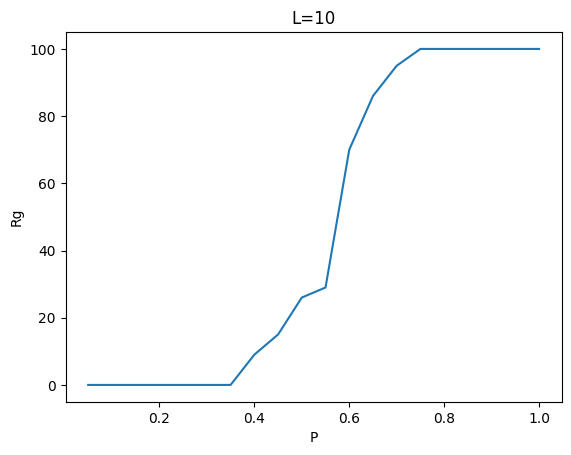

In [5]:
#I choose 4.2 for this quest:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

X=[]
Y=[]

L = 10  #length of the squares
intmax=20000
p=0
success=0
print("L:",L)
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    X.append(round(1-p,3))
    Y.append(success)
    success=0
    p+=0.05

plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=10")

plt.plot(X,Y)
plt.show()

### L=20

L: 20
p: 1    | success: 100 %
p: 0.95    | success: 100 %
p: 0.9    | success: 100 %
p: 0.85    | success: 100 %
p: 0.8    | success: 100 %
p: 0.75    | success: 100 %
p: 0.7    | success: 98 %
p: 0.65    | success: 86 %
p: 0.6    | success: 63 %
p: 0.55    | success: 33 %
p: 0.5    | success: 6 %
p: 0.45    | success: 0 %
p: 0.4    | success: 0 %
p: 0.35    | success: 0 %
p: 0.3    | success: 0 %
p: 0.25    | success: 0 %
p: 0.2    | success: 0 %
p: 0.15    | success: 0 %
p: 0.1    | success: 0 %
p: 0.05    | success: 0 %


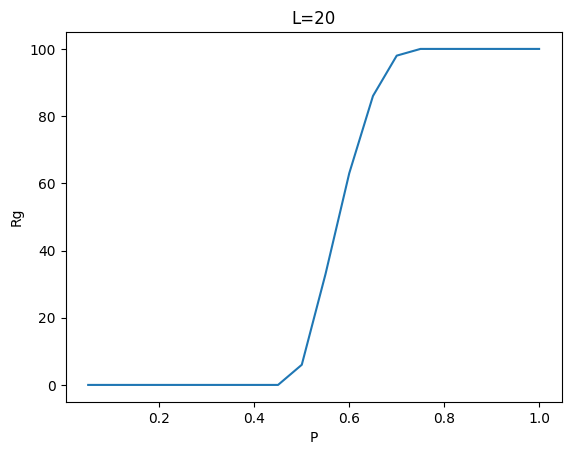

In [13]:
#I choose 4.2 for this quest:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

X=[]
Y=[]

L = 20  #length of the squares
intmax=20000
p=0
success=0
print("L:",L)
x10=[] #p
y10=[] #Rg
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    X.append(round(1-p,3))
    Y.append(success)
    success=0
    p+=0.05

plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=20")

plt.plot(X,Y)
plt.show()

### L=40

L: 40
p: 1    | success: 100 %
p: 0.95    | success: 100 %
p: 0.9    | success: 100 %
p: 0.85    | success: 100 %
p: 0.8    | success: 100 %
p: 0.75    | success: 100 %
p: 0.7    | success: 100 %
p: 0.65    | success: 100 %
p: 0.6    | success: 80 %
p: 0.55    | success: 10 %
p: 0.5    | success: 0 %
p: 0.45    | success: 0 %
p: 0.4    | success: 0 %
p: 0.35    | success: 0 %
p: 0.3    | success: 0 %
p: 0.25    | success: 0 %
p: 0.2    | success: 0 %
p: 0.15    | success: 0 %
p: 0.1    | success: 0 %
p: 0.05    | success: 0 %


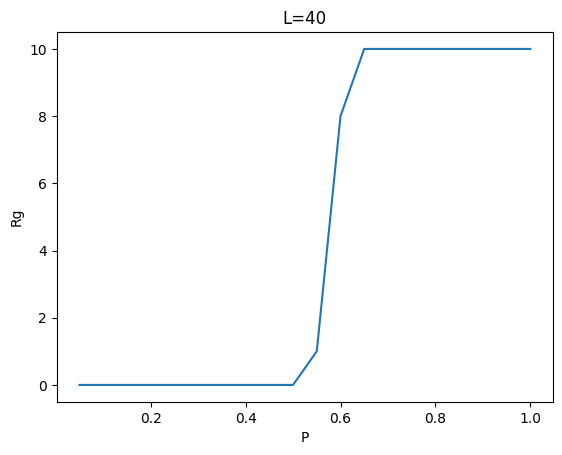

In [10]:
#I choose 4.2 for this quest:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

X=[]
Y=[]

L = 40  #length of the squares
intmax=20000
p=0
success=0
print("L:",L)
while p <=1:
    for i in range(10):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success*10,"%")
    X.append(round(1-p,3))
    Y.append(success)
    success=0
    p+=0.05

plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=40")

plt.plot(X,Y)
plt.show()


### L=80

L: 80
p: 1    | success: 100 %
p: 0.95    | success: 100 %
p: 0.9    | success: 100 %
p: 0.85    | success: 100 %
p: 0.8    | success: 100 %
p: 0.75    | success: 100 %
p: 0.7    | success: 100 %
p: 0.65    | success: 100 %
p: 0.6    | success: 50 %
p: 0.55    | success: 0 %
p: 0.5    | success: 0 %
p: 0.45    | success: 0 %
p: 0.4    | success: 0 %
p: 0.35    | success: 0 %
p: 0.3    | success: 0 %
p: 0.25    | success: 0 %
p: 0.2    | success: 0 %
p: 0.15    | success: 0 %
p: 0.1    | success: 0 %
p: 0.05    | success: 0 %


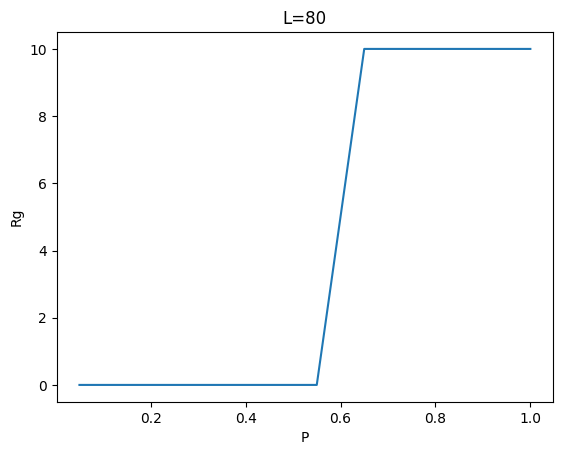

In [11]:
#I choose 4.2 for this quest:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

X=[]
Y=[]

L = 80  #length of the squares
intmax=20000
p=0
success=0
print("L:",L)
while p <=1:
    for i in range(10):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success*10,"%")
    X.append(round(1-p,3))
    Y.append(success)
    success=0
    p+=0.05

plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=80")

plt.plot(X,Y)
plt.show()

### L=160

In [12]:
#I choose 4.2 for this quest:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

X=[]
Y=[]

L = 160  #length of the squares
intmax=20000
p=0
success=0
print("L:",L)
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    X.append(round(1-p,3))
    Y.append(success)
    success=0
    p+=0.05

plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=160")

plt.plot(X,Y)
plt.show()

L: 160


KeyboardInterrupt: 

## Question 4.5 (The Probabilty of connecting to an infinite cluster(Q∞))

### L=10

In [9]:
#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 10  
intmax=20000
p=0
success=0
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
                    print('Q∞:',max(shepherdspie.values())/L**2)
        #########################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    success=0
    p+=0.05

Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
p: 1    | success: 100 %
Q∞: 0.96
Q∞: 0.95
Q∞: 0.97
Q∞: 0.95
Q∞: 0.98
Q∞: 0.94
Q∞: 0.97
Q∞: 0.98
Q∞: 0.93
Q∞: 0.94
Q∞: 0.97
Q∞: 0.96
Q∞: 0.97
Q∞: 0.88
Q∞: 0.92
Q∞: 0.99
Q∞: 0.97
Q∞: 0.97
Q∞: 0.98
Q∞: 

### L=20

In [14]:
#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 20
intmax=20000
p=0
success=0
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
                    print('Q∞:',max(shepherdspie.values())/L**2)
        #########################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    success=0
    p+=0.05

Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
Q∞: 1.0
p: 1    | success: 100 %
Q∞: 0.925
Q∞: 0.9625
Q∞: 0.9575
Q∞: 0.94
Q∞: 0.945
Q∞: 0.955
Q∞: 0.925
Q∞: 0.965
Q∞: 0.965
Q∞: 0.955
Q∞: 0.9425
Q∞: 0.9675
Q∞: 0.945
Q∞: 0.9575
Q∞: 0.605
Q∞: 0.625
Q∞: 0.9675


### L=40

In [ ]:
#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 40  
intmax=20000
p=0
success=0
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
                    print('Q∞:',max(shepherdspie.values())/L**2)
        #########################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    success=0
    p+=0.05

### L=80

In [ ]:
#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 80  
intmax=20000
p=0
success=0
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
                    print('Q∞:',max(shepherdspie.values())/L**2)
        #########################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    success=0
    p+=0.05

### L=160

In [ ]:
#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 160  
intmax=20000
p=0
success=0
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
                    print('Q∞:',max(shepherdspie.values())/L**2)
        #########################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    success=0
    p+=0.05

## Question 4.6 (Correlation Length(ζ))

### L=10

Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.062

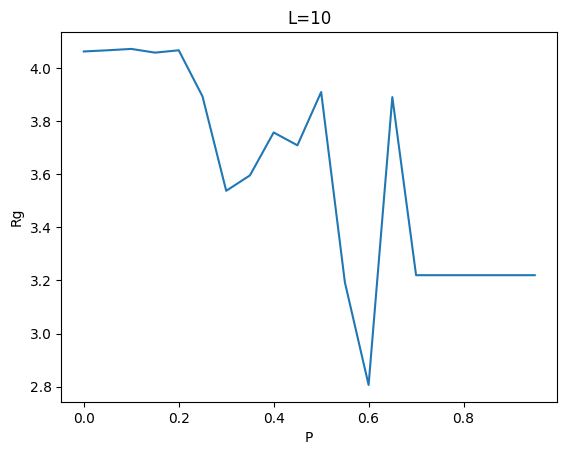

In [ ]:
# Rg= sum(ri^2-rc^2/number)^0.5 : Correlation Length


#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 10  
intmax=20000
p=0
success=0
x10=[] #p
y10=[] #Rg
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
##########################################################################(finding correlation length)
                    maxval= max(shepherdspie.values())
                    for i in shepherdspie:
                        if shepherdspie[i]== maxval:
                            infinity=i
                    cow=[]
                    for i in meow:
                        if meow[i]== infinity:
                            cow.append(i)
                    meanx=0
                    meany=0
                    num=0
                    for i in cow:
                        meanx+=i[0]
                        meany+=i[1]
                        num+=1
                    meanx=meanx/num
                    meany=meany/num
                    rc2= meanx**2 + meany**2
                    R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
                    for i in cow:
                        ri2= i[0]**2 + i[1]**2
                        R+= ri2 - rc2
                    Rg= math.sqrt(abs(R)/num)
                    print("Rg= ", Rg)
###########################################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    #plotting P and Rg
    x10.append(p) #a sample p for every Rg not all of them
    y10.append(Rg) 
    success=0
    p+=0.05

maxy10=max(y10)
index10=y10.index(maxy10)
print()
print("pc=", x10[index10])

plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=10")

plt.plot(x10,y10)
plt.show()

### L=20

Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.154753215150045
Rg=  8.1547

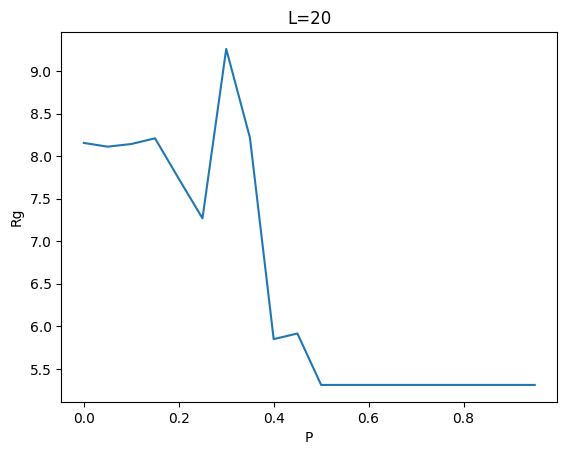

In [ ]:
# Rg= sum(ri^2-rc^2/number)^0.5 : Correlation Length


#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 20  
intmax=20000
p=0
success=0
x20=[] #p
y20=[] #Rg
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
##########################################################################(finding correlation length)
                    maxval= max(shepherdspie.values())
                    for i in shepherdspie:
                        if shepherdspie[i]== maxval:
                            infinity=i
                    cow=[]
                    for i in meow:
                        if meow[i]== infinity:
                            cow.append(i)
                    meanx=0
                    meany=0
                    num=0
                    for i in cow:
                        meanx+=i[0]
                        meany+=i[1]
                        num+=1
                    meanx=meanx/num
                    meany=meany/num
                    rc2= meanx**2 + meany**2
                    R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
                    for i in cow:
                        ri2= i[0]**2 + i[1]**2
                        R+= ri2 - rc2
                    Rg= math.sqrt(abs(R)/num)
                    print("Rg= ", Rg)
###########################################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    #plotting P and Rg
    x20.append(p) #a sample p for every Rg not all of them
    y20.append(Rg) 
    success=0
    p+=0.05

maxy20=max(y20)
index20=y20.index(maxy20)
print()
print("pc=", x20[index20])

plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=20")

plt.plot(x20,y20)
plt.show()

### L=40

Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
Rg=  16.32482771731451
p: 1    | success: 10 %
Rg=  16.49399943318955
Rg=  16.089136612559297
Rg=  16.31439859774316
Rg=  16.407651379002424
Rg=  16.331010496264543
Rg=  16.311145442109705
Rg=  16.322188059586143
Rg=  16.446086072464695
Rg=  16.317775697442027
Rg=  16.336583585553715
p: 0.95    | success: 10 %
Rg=  16.395856061341718
Rg=  15.820903721282125
Rg=  16.406041042262867
Rg=  16.294860968305763
Rg=  15.161768124335934
Rg=  16.319151233588272
Rg=  16.3767798767403
Rg=  16.328258140716038
Rg=  16.491952809249725
Rg=  16.472675585910757
p: 0.9    | success: 10 %
Rg=  15.816308485823225
Rg=  16.157262595189895
Rg=  16.202882351555765
Rg=  16.529927314175186
Rg=  15.207423163703162
Rg=  14.762082558187407
Rg=  16.441837138109385
Rg=  16.248781325234212
Rg=  17.2555136070709
Rg=

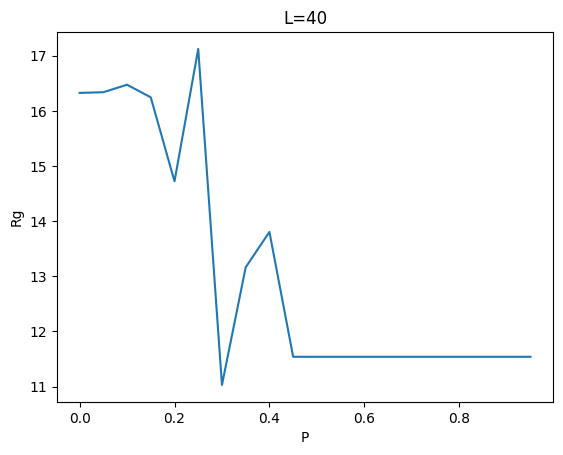

In [ ]:
# Rg= sum(ri^2-rc^2/number)^0.5 : Correlation Length


#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 40  
intmax=20000
p=0
success=0
x40=[] #p
y40=[] #Rg
while p <=1:
    for i in range(10):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
##########################################################################(finding correlation length)
                    maxval= max(shepherdspie.values())
                    for i in shepherdspie:
                        if shepherdspie[i]== maxval:
                            infinity=i
                    cow=[]
                    for i in meow:
                        if meow[i]== infinity:
                            cow.append(i)
                    meanx=0
                    meany=0
                    num=0
                    for i in cow:
                        meanx+=i[0]
                        meany+=i[1]
                        num+=1
                    meanx=meanx/num
                    meany=meany/num
                    rc2= meanx**2 + meany**2
                    R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
                    for i in cow:
                        ri2= i[0]**2 + i[1]**2
                        R+= ri2 - rc2
                    Rg= math.sqrt(abs(R)/num)
                    print("Rg= ", Rg)
###########################################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    #plotting P and Rg
    x40.append(p) #a sample p for every Rg not all of them
    y40.append(Rg) 
    success=0
    p+=0.05

maxy40=max(y40)
index40=y40.index(maxy40)
print()
print("pc=", x40[index40])
plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=40")

plt.plot(x40,y40)
plt.show()

### L=80

Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
Rg=  32.657311585615865
p: 1    | success: 10 %
Rg=  32.69971036373813
Rg=  32.6293095651674
Rg=  30.16315822868813
Rg=  32.71839701701562
Rg=  32.64433404534507
Rg=  32.7026205576811
Rg=  32.58434131497332
Rg=  32.69027436122584
Rg=  29.291245007840455
Rg=  30.306611339409553
p: 0.95    | success: 10 %
Rg=  32.78863786308641
Rg=  32.92807510239153
Rg=  29.825743124059848
Rg=  33.376280735419684
Rg=  32.5376392337293
Rg=  32.034107386096935
Rg=  28.768571580070734
Rg=  32.40722776395191
Rg=  33.05611589657433
Rg=  32.10618811358414
p: 0.9    | success: 10 %
Rg=  31.752325225180048
Rg=  32.88584044773983
Rg=  29.74938221878644
Rg=  32.978201833227
Rg=  28.087154706518707
Rg=  32.3438337668678
Rg=  29.667049841060205
Rg=  27.64807725721638
Rg=  33.05009987056971
Rg=  30.84050

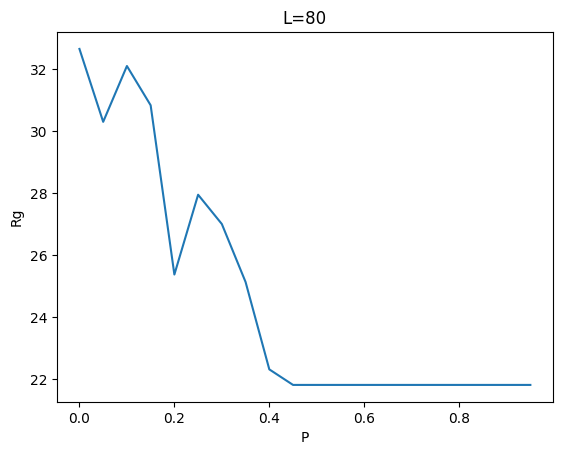

In [39]:
# Rg= sum(ri^2-rc^2/number)^0.5 : Correlation Length


#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 80  
intmax=20000
p=0
success=0
x80=[] #p
y80=[] #Rg
while p <=1:
    for i in range(10):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
##########################################################################(finding correlation length)
                    maxval= max(shepherdspie.values())
                    for i in shepherdspie:
                        if shepherdspie[i]== maxval:
                            infinity=i
                    cow=[]
                    for i in meow:
                        if meow[i]== infinity:
                            cow.append(i)
                    meanx=0
                    meany=0
                    num=0
                    for i in cow:
                        meanx+=i[0]
                        meany+=i[1]
                        num+=1
                    meanx=meanx/num
                    meany=meany/num
                    rc2= meanx**2 + meany**2
                    R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
                    for i in cow:
                        ri2= i[0]**2 + i[1]**2
                        R+= ri2 - rc2
                    Rg= math.sqrt(abs(R)/num)
                    print("Rg= ", Rg)
###########################################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    #plotting P and Rg
    x80.append(p) #a sample p for every Rg not all of them
    y80.append(Rg) 
    success=0
    p+=0.05

maxy80=max(y80)
index80=y80.index(maxy80)
print()
print("pc=", x80[index10])
plt.xlabel("P")
plt.ylabel("Rg")

plt.title("L=80")

plt.plot(x80,y80)
plt.show()

### L=160

In [15]:
# Rg= sum(ri^2-rc^2/number)^0.5 : Correlation Length


#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 160  
intmax=20000
p=0
success=0
x160=[] #p
y160=[] #Rg
while p <=1:
    for i in range(10):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
##########################################################################(finding correlation length)
                    maxval= max(shepherdspie.values())
                    for i in shepherdspie:
                        if shepherdspie[i]== maxval:
                            infinity=i
                    cow=[]
                    for i in meow:
                        if meow[i]== infinity:
                            cow.append(i)
                    meanx=0
                    meany=0
                    num=0
                    for i in cow:
                        meanx+=i[0]
                        meany+=i[1]
                        num+=1
                    meanx=meanx/num
                    meany=meany/num
                    rc2= meanx**2 + meany**2
                    R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
                    for i in cow:
                        ri2= i[0]**2 + i[1]**2
                        R+= ri2 - rc2
                    Rg= math.sqrt(abs(R)/num)

###########################################################################
                    b=1
                    break
        if b==0:
            True

    #plotting P and Rg
    x160.append(p) #a sample p for every Rg not all of them
    y160.append(Rg) 
    success=0
    p+=0.05
maxy160=max(y160)
index160=y160.index(maxy160)

plt.xlabel("P")
plt.ylabel("Rg")
plt.title("L=160")

plt.plot(x160,y160)
plt.show()

KeyboardInterrupt: 

## Question 4.7 (Critical Exponent(V))

Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.06201920231798
Rg=  4.062

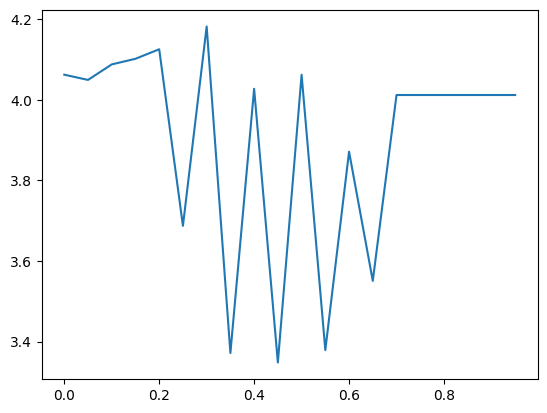

In [ ]:
# abs(pc(L)-pc(infinity)) ~ L ^-1/v   FOR L=10

#we need to do 4.2 and 4.3 method both at the same time because the first shows if Q eccures and the second shows shows what is the length of the percolation(Q)
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches


L = 10  
intmax=20000
p=0
success=0
x10=[] #p
y10=[] #Rg
while p <=1:
    for i in range(100):
        colorstate={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    colorstate[(0,y)]=number
                if x==L-1:
                    number = intmax
                    colorstate[(x,y)]=number 
        ###################################################(Hoshen Kopelman part)
        meow={}
        for x in range (0,L,1): 
            for y in range (0,L,1): 
                if x==0:
                    number = 1
                    meow[(0,y)]=number
        ###################################################
        k=1
        for x in range (0,L,1): 
            for y in range (L-1,-1,-1): 
                gridnumber=np.random.rand()
                if gridnumber >= p : # pink = on
                    colorstate[(x,y)]= np.random.randint(1,intmax,1)
                    a=0
                    list=[]
                    if (x+1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x+1,y)])
                    if (x-1,y)  in colorstate:
                        a+=1
                        list.append(colorstate[(x-1,y)])
                    if (x,y+1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y+1)])
                    if (x,y-1)  in colorstate:
                        a+=1
                        list.append(colorstate[(x,y-1)])                            
                    if a==0:
                        True
                    if a==1:
                        colorstate[(x,y)]=list[0]
                    if a>1:
                        colorstate[(x,y)]=min(list)
                        for i in colorstate:
                            if colorstate[i] in list:
                                colorstate[i]=min(list)
        #######################################################(Hoshen Kopelman part)
                    b=0
                    jojo=[]
                    if (x-1,y)  in meow:
                        b+=1
                        jojo.append(meow[(x-1,y)])
                    if (x,y+1)  in meow:
                        b+=1
                        jojo.append(meow[(x,y+1)])                            
                    if b==0:
                        meow[(x,y)]=k
                        k+=1 
                    if b==1:
                        meow[(x,y)]=jojo[0]
                    if b>1:
                        meow[(x,y)]=meow[(x-1,y)]
                        meow[(x,y+1)]=meow[(x-1,y)]
        #########################################################
                else:  #white= off
                    True
        b=0
        for y in range (0,L,1): 
                if colorstate[(L-1,y)]== 1:
                    success+=1
        #######################################################(Hoshen Kopelman part)
                    shepherdspie={}   #this shows how many times a value has been repeated (so we can find the maximum repeatance as it's the infinite cluster)          
                    for i in range( min(meow.values()) , max(meow.values())+1):
                        shepherdspie[i]=0
                    for j in meow.values():
                        shepherdspie[j]+=1
##########################################################################(finding correlation length)
                    maxval= max(shepherdspie.values())
                    for i in shepherdspie:
                        if shepherdspie[i]== maxval:
                            infinity=i
                    cow=[]
                    for i in meow:
                        if meow[i]== infinity:
                            cow.append(i)
                    meanx=0
                    meany=0
                    num=0
                    for i in cow:
                        meanx+=i[0]
                        meany+=i[1]
                        num+=1
                    meanx=meanx/num
                    meany=meany/num
                    rc2= meanx**2 + meany**2
                    R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
                    for i in cow:
                        ri2= i[0]**2 + i[1]**2
                        R+= ri2 - rc2
                    Rg= math.sqrt(abs(R)/num)
                    print("Rg= ", Rg)
###########################################################################
                    b=1
                    break
        if b==0:
            True
    print('p:',round(1-p,3),"   | success:",success,"%")
    #plotting P and Rg
    x10.append(p) #a sample p for every Rg not all of them
    y10.append(Rg) 
    success=0
    p+=0.05

maxy10=max(y10)
index10=y10.index(maxy10)
print()
pcL =x10[index10]
print("pc=", pcL)
print()
########################################################################################
#finding v :
pcinf=0.5  # AND pcL =x10[index10]
v=-1/(math.log(abs(pcL-pcinf),L))
print("v=",v)
########################################################################################

plt.plot(x10,y10)
plt.show()

## Question 4.8 (mass dimention of correlation clusters)

### p=0.5

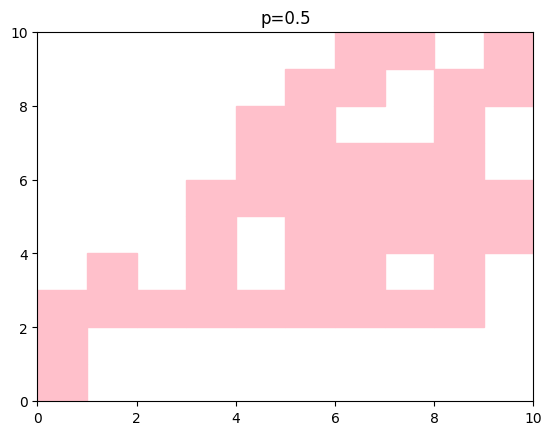


s= 49
Rg=  3.787130490371794


In [106]:
states=[[0,0]]
p1=0.5

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for i in states:
    gridnumber=np.random.rand()
    if i[0]+1 <= 10:
        if [i[0]+1,i[1]] not in states:
            if gridnumber>= p1:
                    states.append([i[0]+1,i[1]])
    gridnumber=np.random.rand()
    if i[1]+1 <= 10:
        if [i[0],i[1]+1] not in states:
            if gridnumber>= p1:
                    states.append([i[0],i[1]+1])

#drawing
for j in states:
    square = plt.Rectangle(j, width=1, height=1, fill=True, facecolor='pink', edgecolor='pink', linewidth=1)
    ax.add_patch(square)
    p1=0.55
    
plt.title("p=0.5")
plt.show()
print()

#s
s1=len(states)
print('s=',s1)

#Rg
meanx=0
meany=0
num=0
for i in states:
    meanx+=i[0]
    meany+=i[1]
    num+=1
meanx=meanx/num
meany=meany/num
rc2= meanx**2 + meany**2
R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
for i in states:
    ri2= i[0]**2 + i[1]**2
    R+= ri2 - rc2
Rg1= math.sqrt(abs(R)/num)
print("Rg= ", Rg1)


### p=0.55

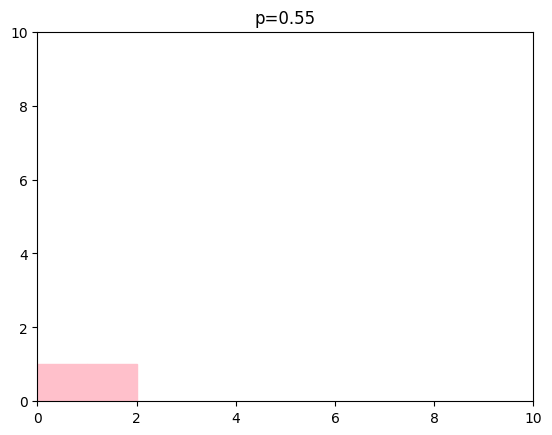


s= 2
Rg=  0.5


In [105]:
states=[[0,0]]
p2=0.55

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for i in states:
    gridnumber=np.random.rand()
    if i[0]+1 <= 10:
        if [i[0]+1,i[1]] not in states:
            if gridnumber>= p2:
                    states.append([i[0]+1,i[1]])
    gridnumber=np.random.rand()
    if i[1]+1 <= 10:
        if [i[0],i[1]+1] not in states:
            if gridnumber>= p2:
                    states.append([i[0],i[1]+1])


#drawing
for j in states:
    square = plt.Rectangle(j, width=1, height=1, fill=True, facecolor='pink', edgecolor='pink', linewidth=1)
    ax.add_patch(square)
plt.title("p=0.55")
plt.show()
print()

#s
s2=len(states)
print('s=',s2)

#Rg
meanx=0
meany=0
num=0
for i in states:
    meanx+=i[0]
    meany+=i[1]
    num+=1
meanx=meanx/num
meany=meany/num
rc2= meanx**2 + meany**2
R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
for i in states:
    ri2= i[0]**2 + i[1]**2
    R+= ri2 - rc2
Rg2= math.sqrt(abs(R)/num)
print("Rg= ", Rg2)



### p=0.59

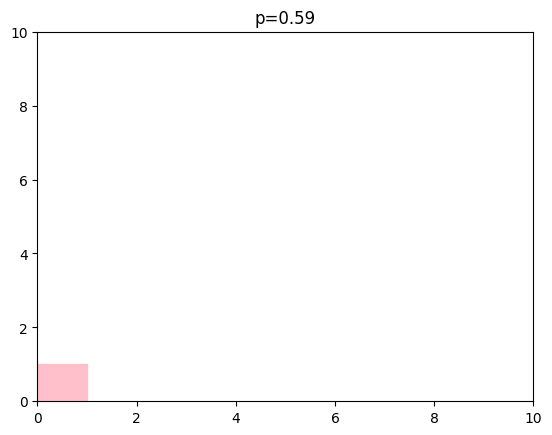


s= 1
Rg=  0.0


In [104]:
states=[[0,0]]
p3=0.59

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for i in states:
    gridnumber=np.random.rand()
    if i[0]+1 <= 10:
        if [i[0]+1,i[1]] not in states:
            if gridnumber>= p3:
                    states.append([i[0]+1,i[1]])
    gridnumber=np.random.rand()
    if i[1]+1 <= 10:
        if [i[0],i[1]+1] not in states:
            if gridnumber>= p3:
                    states.append([i[0],i[1]+1])


#drawing
for j in states:
    square = plt.Rectangle(j, width=1, height=1, fill=True, facecolor='pink', edgecolor='pink', linewidth=1)
    ax.add_patch(square)
plt.title("p=0.59")
plt.show()
print()

s3=len(states)
#s
print('s=', s3)

#Rg
meanx=0
meany=0
num=0
for i in states:
    meanx+=i[0]
    meany+=i[1]
    num+=1
meanx=meanx/num
meany=meany/num
rc2= meanx**2 + meany**2
R=0 # Rg= (sum((ri^2-rc^2)/number))^0.5 
for i in states:
    ri2= i[0]**2 + i[1]**2
    R+= ri2 - rc2
Rg3= math.sqrt(abs(R)/num)
print("Rg= ", Rg3)


### plotting log(s) based on log(ζ) (ζ=Rg)

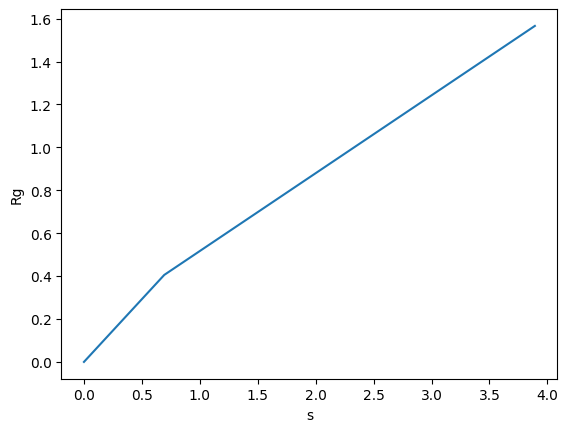

In [112]:
#log(s) = x / log(ζ) = y

plt.plot([math.log(s1),math.log(s2),math.log(s3)],[math.log(Rg1+1),math.log(Rg2+1),math.log(Rg3+1)])

plt.xlabel("s")
plt.ylabel("Rg")
plt.show()